In [19]:
import tarfile
import os

extract_path = "./analysis/"

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

if not os.listdir(extract_path):
    archive_path = "results/jetson.tar.gz"

    with tarfile.open(archive_path) as file:
        file.extractall(extract_path)

In [20]:
import pandas as pd
import os

jetson_metrics_dir = "analysis/jetson/metrics/"

directory = os.fsencode(jetson_metrics_dir)
jetson_dataframes = {}

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        training_type = filename.split("-")[2]
        jetson_dataframes[training_type] = pd.read_csv(
            f"{jetson_metrics_dir}{filename}"
        )

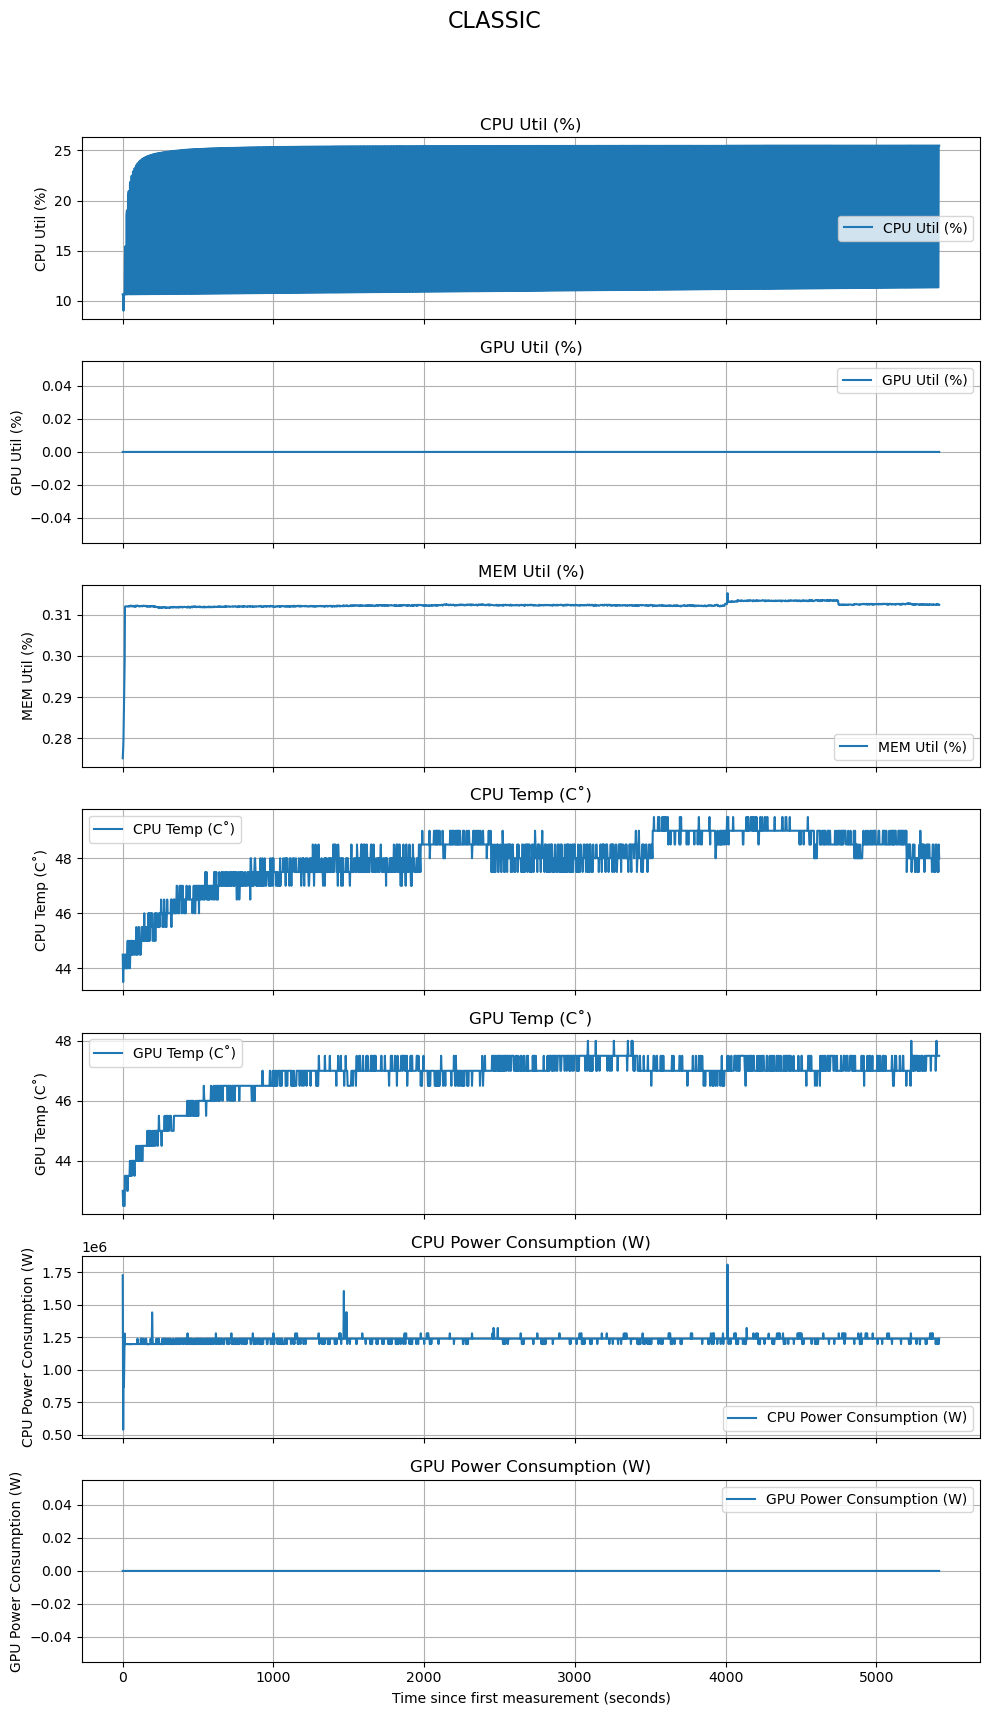

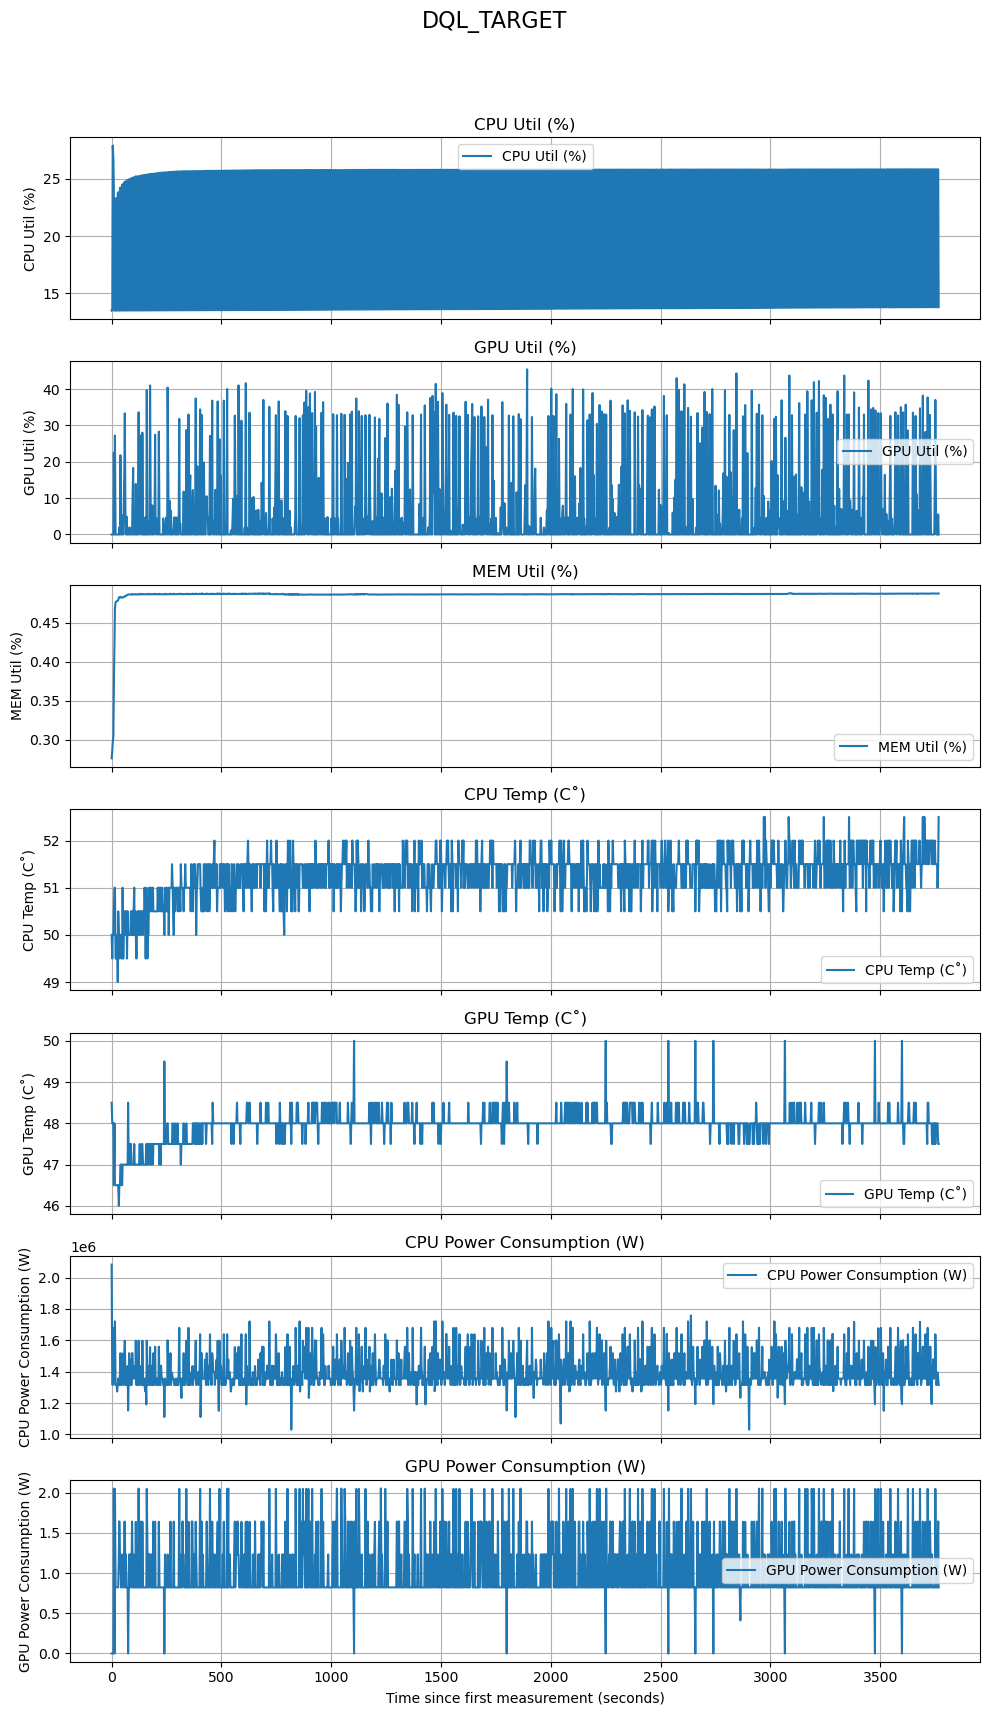

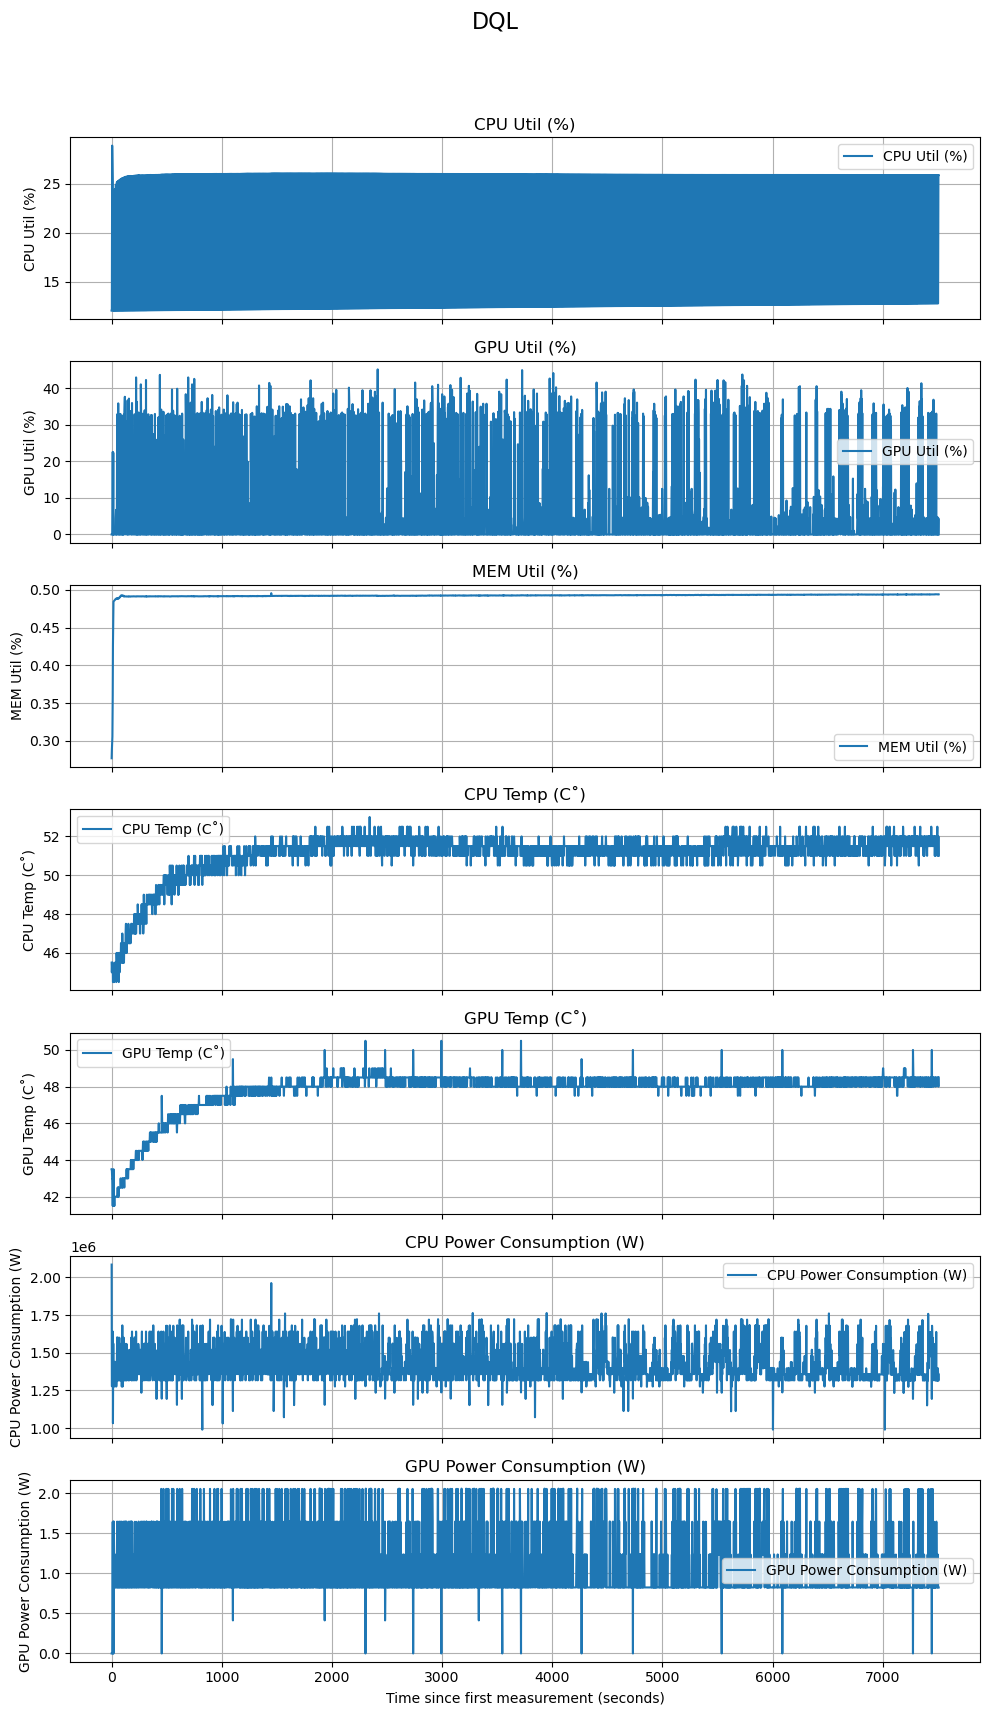

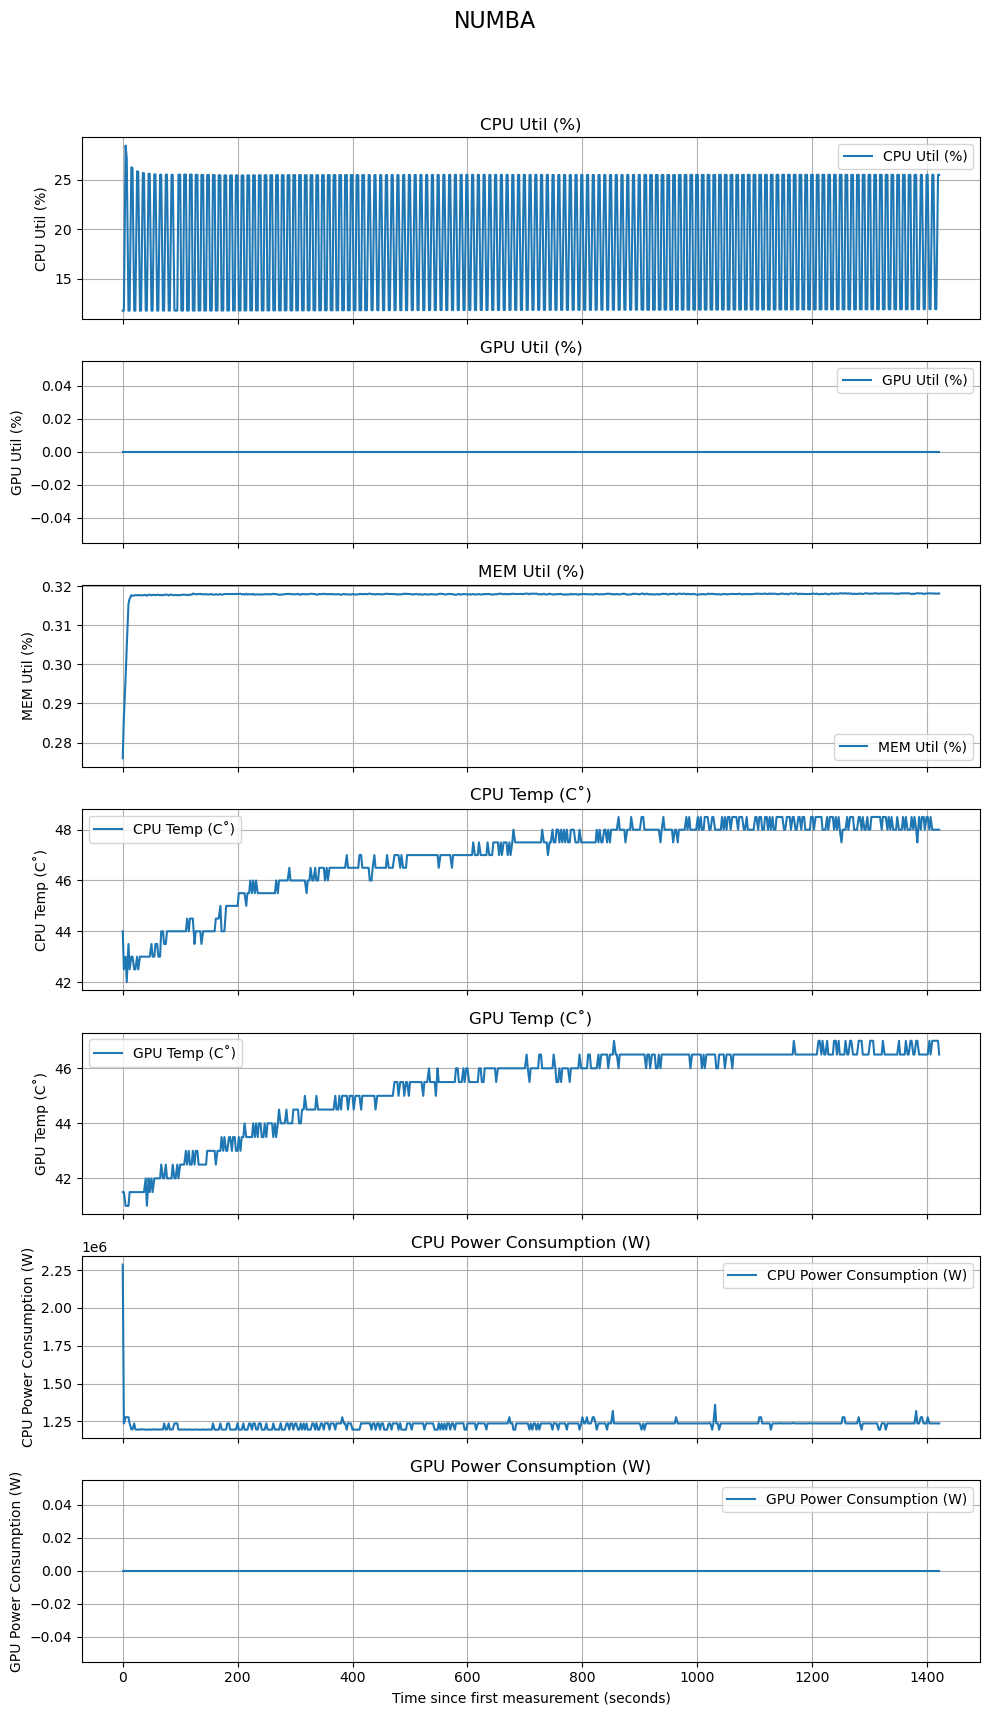

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict


def plot_dataframes(dataframes: Dict[str, pd.DataFrame]):
    for training_type, df in dataframes.items():
        df["TimeDelta"] = pd.to_timedelta(df["Time"])
        min_time = df["TimeDelta"].min()
        df["TimeSinceFirst"] = df["TimeDelta"] - min_time
        df["TimeSinceFirstInSeconds"] = df["TimeSinceFirst"].dt.total_seconds()
        df["GPU Power Consumption"] = df["GPU Power Consumption"] / 100000
        df["CPU Power Consumption"] = df["CPU Power Consumption"]

        fig, axs = plt.subplots(7, 1, figsize=(10, 18), sharex=True)
        fig.suptitle(training_type.upper(), fontsize=16)

        metrics = {
            "CPU Util": "CPU Util (%)",
            "GPU Util": "GPU Util (%)",
            "MEM Util": "MEM Util (%)",
            "CPU Temp": "CPU Temp (C˚)",
            "GPU Temp": "GPU Temp (C˚)",
            "CPU Power Consumption": "CPU Power Consumption (W)",
            "GPU Power Consumption": "GPU Power Consumption (W)",
        }

        for ax, metric in zip(axs, metrics.keys()):
            if metric in df.columns:
                ax.plot(
                    df["TimeSinceFirstInSeconds"],
                    df[metric],
                    label=metrics[metric],
                    linewidth=1.5,
                )
                ax.set_title(metrics[metric])
                ax.set_ylabel(metrics[metric])
                ax.grid(True)
                ax.legend()

        plt.xlabel("Time since first measurement (seconds)")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


plot_dataframes(jetson_dataframes)